# Introduction à MATLAB

MATLAB (MATrix LABoratory) est un environnement de calcul numérique interactif et un language de programmation utilisé principalement pour des tâches de calcul et simulations scientifiques et techniques. Il a été initialement développé à la fin des années 70 par Cleve Moler (alors à l'université de New Mexico), qui souhaitait permettre à ses élèves d'utiliser les librairies d'algèbre linéaire numérique à un plus "haut-niveau" que par la programmation en Fortran. Le language a été ensuite rapidement adopté par les mathématiciens appliqués. En 1984, Moler fonde la société [MathWorks](http://www.mathworks.com/index.html?s_tid=gn_logo) avec Jack Little, un ingénieur automaticien, pour commercialiser MATLAB.


## Exemples d'utilisation de Matlab

MATLAB est une plate-forme très populaire pour des tâches comme:
* Le développement et l'implémentation d'algorithmes numériques pour le calcul scientifique, l'algèbre linéaire, la simulation, etc., surtout en phase de *prototypage*.
* la visualisation de données, le tracé de graphiques (2D, 3D, ...), la création d'interfaces utilisateurs
* la modélisation sous forme  graphique (package supplémentaire **Simulink**) de systèmes physiques dynamiques interagissant avec des systèmes de calcul (avec possibilité de génération de code pour les algorithmes implémentés)
* le développement de scripts pour interfacer des programmes écrits dans différents languages (C, C++, Fortran, etc.)
* ...

Un des avantages de cet environnement est la disponibilité de "toolboxes" implémentant de nombreux algorithmes spécifiques à des domaines particuliers: commande, traitement du signal et des images, vision par ordinateur, robotique, aérospatiale, EDP, communications, etc. Ces toolboxes peuvent être payantes (commercialisées par MathWorks ou autre), distribuées gratuitement, ou même open-source, surtout pour les toolboxes destinées à la recherche. La commande **`ver`** affiche les toolboxes disponibles sur votre système et leur version. 

In [1]:
ver

----------------------------------------------------------------------------------------------------
MATLAB Version: 8.5.0.197613 (R2015a)
MATLAB License Number: 182831
Operating System: Mac OS X  Version: 10.11.2 Build: 15C50 
Java Version: Java 1.7.0_60-b19 with Oracle Corporation Java HotSpot(TM) 64-Bit Server VM mixed mode
----------------------------------------------------------------------------------------------------
MATLAB                                                Version 8.5        (R2015a)
Simulink                                              Version 8.5        (R2015a)
Aerospace Blockset                                    Version 3.15       (R2015a)
Aerospace Toolbox                                     Version 2.15       (R2015a)
Communications System Toolbox                         Version 6.0        (R2015a)
Computer Vision System Toolbox                        Version 6.2        (R2015a)
Control System Toolbox                                Version 9.9        (R201

Toutefois, on notera que Matlab n'est pas toujours approprié pour l'implémentation définitive d'un système pour lequel on souhaite obtenir un maximum de performance. MATLAB est un language interprété relativement lent (en règle générale), et un processus de travail assez standard consiste à expérimenter et concevoir un système préliminaire sous MATLAB, puis à implémenter le système final dans un language compilé comme C ou C++. Il est aussi possible de *générer automatiquement du code C ou C++* à partir de Matlab, avec les toolbox Matlab/Simulink/Embedded Coder.

## Bases de MATLAB

### Caractéristiques du language

Voici quelques raisons qui peuvent expliquer le succès de MATLAB comme langage de prototypage rapide en sciences et technologie (et comme language d'enseignement)
* c'est un language interprété, c'est-à-dire qu'évaluer votre code ne requiert pas d'étape de compilation

In [2]:
x = 1, a = 2, b = 3
y = a*x+b

x =

     1


a =

     2


b =

     3


y =

     5

* les types des données sont inférés automatiquement pour vous (à l'inverse du C par exemple), ce qui vous permet de vous concentrer sur le développement de vos algorithmes plutôt que sur le choix de types de bas niveau. En fait, et bien qu'il soit possible de forcer l'utilisation d'autres types (par exemple pour économiser de la mémoire), par défaut toutes les valeurs numériques sont stoquées par MATLAB en `double-precision floating point`. De plus, les *nombres complexes* sont traités par défault, il n'y a pas besoin d'introduire de librairie supplémentaire.

In [3]:
x = 1.3
x = 'bonjour'
x = true
x = sqrt(-1)  % racine carrée
x = 2+1i % autres notations possibles: 1+i, 1+j, 1+1j

x =

    1.3000


x =

bonjour


x =

     1


x =

   0.0000 + 1.0000i


x =

   2.0000 + 1.0000i

* Le calcul matriciel est implémenté par défaut.

In [4]:
B = [1 2;3 4]
C = [5;6]
B*C

B =

     1     2
     3     4


C =

     5
     6


ans =

    17
    39

* il y a un grand nombre de fonctions avancées déjà implémentées, par défaut ou dans les toolbox. Ces implémentations sont généralement de (très) bonne qualité et utilisent des algorithmes performants et souvent sophistiqués, avec lesquels l'utilisateur n'a pas nécessairement besoin d'être familier (ex: quel est le meilleur moyen de résoudre un système $Ax = b$?).

In [5]:
A = randn(8,6)    % génère des variables aléatoires Gaussiennes
b = randn(8,1)
x = A\b  % résout A x = b - si A est carrée, éviter inv(A)!

A =

    0.5377    3.5784   -0.1241    0.4889   -1.0689   -0.1022
    1.8339    2.7694    1.4897    1.0347   -0.8095   -0.2414
   -2.2588   -1.3499    1.4090    0.7269   -2.9443    0.3192
    0.8622    3.0349    1.4172   -0.3034    1.4384    0.3129
    0.3188    0.7254    0.6715    0.2939    0.3252   -0.8649
   -1.3077   -0.0631   -1.2075   -0.7873   -0.7549   -0.0301
   -0.4336    0.7147    0.7172    0.8884    1.3703   -0.1649
    0.3426   -0.2050    1.6302   -1.1471   -1.7115    0.6277


b =

    1.0933
    1.1093
   -0.8637
    0.0774
   -1.2141
   -1.1135
   -0.0068
    1.5326


x =

    0.7763
    0.0082
   -0.1512
    0.3380
   -0.2133
    1.6097

Attention: au démarrage de l'interpréteur, **`i`** et **`j`** dont définis comme le nombre complexe $\sqrt{-1}$. Si vous les utilisez comme nom de variable et les redéfinissez, ils perdront bien évidemment cette valeur. Pour éviter les erreurs, je recommande l'utilisation des notations **`1i`** ou **`1j`**.

### Premiers pas

Déclaration d'une matrice, sélection d'éléments, création de vecteurs, et commentaires. Attention, les **indices des tableaux dans MATLAB commencent à 1** (et non pas à 0 comme en C ou Python). 

In [6]:
A=[1 2 3 4 5; 6 7 8 9 10; 11 12 13 14 15]
B=[1,2,3,4,5;6,7,8,9,10;11,12,13,14,15];  % syntaxe équivalente avec virgule - le ; supprime l'affichage du résultat
s = size(A)  % voir l'aide pour les fonctions size et length
v = 1:2:7  % suite numérique avec saut de 2, stockée dans un vecteur ligne
b = B(3,4)  % sélection d'un élément
A(2,:)  % sélectrion de tous les éléments sur la 2ème ligne
A(:,3)  % sélection de tous les éléments sur la 3ème colonne
A(2:3,3:4)  % sélection d'un sous-ensemble d'indices à l'aide de vecteurs d'indices
A(2:3,1:2:5)
A([3 1],v(1:3))
v1 = 0:0.25:1  % pas de 0.25
v2 = linspace(0,1,5)  % 5 éléments de 0 à 1 espacés linéairement - v2 = v1
v3 = logspace(1,2,5)  % espacement logarithmique entre 10^i1 et 10^i2

A =

     1     2     3     4     5
     6     7     8     9    10
    11    12    13    14    15


s =

     3     5


v =

     1     3     5     7


b =

    14


ans =

     6     7     8     9    10


ans =

     3
     8
    13


ans =

     8     9
    13    14


ans =

     6     8    10
    11    13    15


ans =

    11    13    15
     1     3     5


v1 =

         0    0.2500    0.5000    0.7500    1.0000


v2 =

         0    0.2500    0.5000    0.7500    1.0000


v3 =

   10.0000   17.7828   31.6228   56.2341  100.0000

L'interpréteur retourne une erreur d'indice lorsqu'il évalue une expression incorrecte.

In [7]:
A([1 4],[1 2 4])

Index exceeds matrix dimensions.


Création de certaines matrices élémentaires.

In [8]:
A = eye(4)  % identité
A = zeros(3,4)  
A = zeros(3)  % Attention, même chose que zeros(3,3)
A = ones(3)  % Attention, même chose que ones(3,3)
A = ones(2,3)
A = rand(3,4)  % variables aléatoires uniformes entre 0 et 1

A =

     1     0     0     0
     0     1     0     0
     0     0     1     0
     0     0     0     1


A =

     0     0     0     0
     0     0     0     0
     0     0     0     0


A =

     0     0     0
     0     0     0
     0     0     0


A =

     1     1     1
     1     1     1
     1     1     1


A =

     1     1     1
     1     1     1


A =

    0.3404    0.7513    0.6991    0.5472
    0.5853    0.2551    0.8909    0.1386
    0.2238    0.5060    0.9593    0.1493

Notez que le calcul matriciel est utilisé par défaut. Si on veut faire des calculs sur les éléments individuels de vecteurs ou matrices, il faut le préciser avec des opérateurs spéciaux (précédés par un point). Ceci dit certaines fonctions qui n'ont pas de version matricielle opèrent sur les éléments individuels.

In [9]:
B = [1 2;3 4]
B*B   % multiplication matricielle
B.*B  % multiplication de chaque élément par lui-même
B^2
B.^2
sin(B)  % sin de chaque élément - pas besoin de boucle for!

B =

     1     2
     3     4


ans =

     7    10
    15    22


ans =

     1     4
     9    16


ans =

     7    10
    15    22


ans =

     1     4
     9    16


ans =

    0.8415    0.9093
    0.1411   -0.7568

Un message d'erreur est renvoyé si les dimensions sont incompatibles. 

In [10]:
A1 = rand(2,3); A2 = rand(3,4);
A2*A1

Inner matrix dimensions must agree.


Le language offre des structures de contrôle standard, voir la documentation (boucles **`for`**, **`while`**, tests avec **`if`**, **`elseif`**, **`else`**, etc. Les blocs sont généralement terminés par **`end`**.)

In [11]:
A = zeros(2,3);
for i=1:size(A,1) 
    for j=1:size(A,2)
        A(i,j) = i+j;
    end
end
A

A =

     2     3     4
     3     4     5

En passant, pour développer du code relativement rapide en Matlab, il faut essayer d'implémenter vos opérations commes des opérations de calcul matriciel, et éviter les boucles for, while, etc., qui sont lentes dans ce language. Comparer

In [12]:
n = 1e7;  % 10,000,000
a = ones(1,n);
b = ones(n,1);

In [13]:
tic  % tic et toc permettent de mesurer le temps d'execution d'un bloc de code
res = 0;
for i=1:n
    res = res+a(i)*b(i);
end
res
toc

res =

    10000000

Elapsed time is 3.811070 seconds.

In [14]:
tic
res = a*b
toc

res =

    10000000

Elapsed time is 0.009237 seconds.

Pour aller chercher de bonnes performances avec MATLAB, il faut souvent faire attention à votre code. Voir les références en bas de page.

Quelques autres fonctions utiles:
* **``clear``** pour supprimer certaines ou toutes vos variables de la mémoire
* **``clc``** pour effacer l'écran
* **``save``** et **``load``** pour enregistrer des données sur disque (utile pour conserver le résultat d'un long calcul)
* **``who``**, **``whos``** pour afficher les variables du workspace et leurs propriétés

## Exemples de fonctions disponibles

#### Polynômes
Racines d'un polynôme avec **`roots`**

In [15]:
help roots  % l'aide explique comment utiliser une fonction

ROOTS  Find polynomial roots.
    ROOTS(C) computes the roots of the polynomial whose coefficients
    are the elements of the vector C. If C has N+1 components,
    the polynomial is C(1)*X^N + ... + C(N)*X + C(N+1).
 
    Note:  Leading zeros in C are discarded first.  Then, leading relative
    zeros are removed as well.  That is, if division by the leading
    coefficient results in overflow, all coefficients up to the first
    coefficient where overflow occurred are also discarded.  This process is
    repeated until the leading coefficient is not a relative zero.
 
    Class support for input c: 
       float: double, single
 
    See also POLY, RESIDUE, FZERO.

    Other functions named roots:
       gf/roots
       gpuArray/roots

    Reference page in Help browser
       doc roots

Racines du polynôme $p(x) = 6 x^6 + 5 x^5 + 3 x^3 + 2 x^2 + x$

In [16]:
p = [6 5 0 3 2 1 0]
roots(p)

p =

     6     5     0     3     2     1     0


ans =

   0.0000 + 0.0000i
  -1.1067 + 0.0000i
   0.4481 + 0.6448i
   0.4481 - 0.6448i
  -0.3114 + 0.3837i
  -0.3114 - 0.3837i

Note: en plus de l'aide, il peut être utile de savoir comment une fonction est implémentée. C'est faisable si le code de MathWorks n'appelle pas de fonction C (ou autre) compilée. Vous pouvez localiser les fonctions sur votre système grâce à la commande **`which`**. Il est intéressant de regarder la méthode utilisée par **`roots`** pour calculer les racines d'un polynôme (utilisation de la matrice compagnon).

In [17]:
which roots

/Applications/MATLAB_R2015a.app/toolbox/matlab/polyfun/roots.m

#### Algèbre linéaire

In [18]:
A=[0 1;1 0]
[V,D] = eig(A)  % vecteurs et valeurs propres
d = det(A)
B = (1+1i)*[1 2;3 4]
cj = B'  % attention, matrice conjuguée, pas juste transposée
tr = transpose(B)

A =

     0     1
     1     0


V =

   -0.7071    0.7071
    0.7071    0.7071


D =

    -1     0
     0     1


d =

    -1


B =

   1.0000 + 1.0000i   2.0000 + 2.0000i
   3.0000 + 3.0000i   4.0000 + 4.0000i


cj =

   1.0000 - 1.0000i   3.0000 - 3.0000i
   2.0000 - 2.0000i   4.0000 - 4.0000i


tr =

   1.0000 + 1.0000i   3.0000 + 3.0000i
   2.0000 + 2.0000i   4.0000 + 4.0000i

Exponentielle d'une matrice: attention à la différence entre **`exp`** et **`expm`**

In [19]:
exp(A)  % exponentielle de chaque élément
expm(A)

ans =

    1.0000    2.7183
    2.7183    1.0000


ans =

    1.5431    1.1752
    1.1752    1.5431

#### Fonctions trigonométriques, sur les nombres complexes

In [20]:
atan2(3,2)   % atan2(y,x)
angle(2+3i)  % angle d'un nombre complexe - voir aussi real, imag, abs, conj
t = 0:0.1:1;
sin(t)

ans =

    0.9828


ans =

    0.9828


ans =

  Columns 1 through 7

         0    0.0998    0.1987    0.2955    0.3894    0.4794    0.5646

  Columns 8 through 11

    0.6442    0.7174    0.7833    0.8415

### Equation différentielles

On veut simuler le système (vu en cours)
$$
\begin{align*}
\dot x_1 &= x_2 \\
\dot x_2 &= \frac{K}{M} x_1 - \frac{B}{M} x_2 + \frac{1}{M} f
\end{align*}
$$
pour $x_1(0) = x_2(0) = 0$, avec 
$$
f(t) = \begin{cases}
1 & \text{si } 2 \leq t \leq 3 \\
0 & \text{sinon}.
\end{cases}
$$

In [21]:
M = 10; B = 3; K = 1;
% t0 est l'instant initial, t1 l'instant final
t0 = 0; t1 = 35;
% x0 est la condition initiale (vecteur)
x0 = [0; 0];

On déclare la fonction dérivée (suspension) dans un fichier externe du même nom (suspension.m)
```julia
function xdot = suspension(t,x,M,B,K)
f = 0;
% Exerce une force de 1 pendant l'intervalle [2,3]
if (t >= 2 && t <= 3)
	f = 1;
end
xdot = [x(2); -(K/M)*x(1)-(B/M)*x(2)+(1/M)*f];
```

In [22]:
suspension(1,[1; 1],M,B,K)

ans =

    1.0000
   -0.4000

**`ode45`** est la fonction standard à essayer en premier pour intégrer un équation différentielle. Elle prend comme argument la fonction définissant la dérivée, c'est-à-dire le côté droit du système. Passer cette fonction comme argument nécessite de définir une "fonction handle" dans MATLAB.

In [23]:
fh = @(t,x) suspension(t,x,M,B,K);  % voir solution alternative dans le cours avec variables globales
[t,x] = ode45(fh,[t0,t1],x0);
t(1:10)'
x(1:10,:)'

ans =

  Columns 1 through 7

         0    0.2879    0.5758    0.8637    1.1517    1.2648    1.3780

  Columns 8 through 10

    1.4911    1.6043    1.6364


ans =

     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0

## Fonction graphiques

La fonction de base est **`plot`**, qui peut prendre de nombreux arguments. **`figure`** crée une nouvelle figure pour éviter d'écraser la précédente. 

In [24]:
help plot  % aussi semilogx, semilogy, loglog

PLOT   Linear plot. 
    PLOT(X,Y) plots vector Y versus vector X. If X or Y is a matrix,
    then the vector is plotted versus the rows or columns of the matrix,
    whichever line up.  If X is a scalar and Y is a vector, disconnected
    line objects are created and plotted as discrete points vertically at
    X.
 
    PLOT(Y) plots the columns of Y versus their index.
    If Y is complex, PLOT(Y) is equivalent to PLOT(real(Y),imag(Y)).
    In all other uses of PLOT, the imaginary part is ignored.
 
    Various line types, plot symbols and colors may be obtained with
    PLOT(X,Y,S) where S is a character string made from one element
    from any or all the following 3 columns:
 
           b     blue          .     point              -     solid
           g     green         o     circle             :     dotted
           r     red           x     x-mark             -.    dashdot 
           c     cyan          +     plus               --    dashed   
           m     magenta     

Traçons la solution de l'équation différentielle précédente.

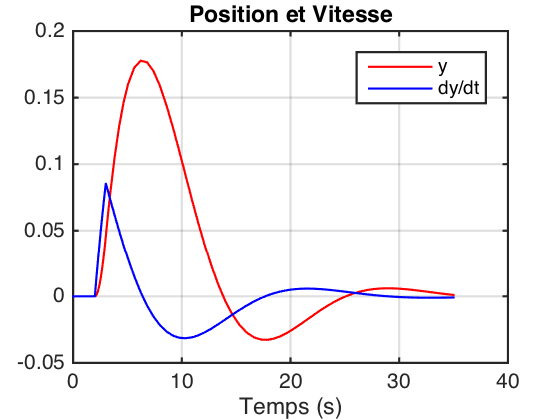

In [25]:
plot(t,x(:,1),'r',t,x(:,2),'b');
title('Position et Vitesse');
xlabel('Temps (s)');
legend('y','dy/dt');
grid on;

Ou avec des figures séparées, mais sur la fenêtre.

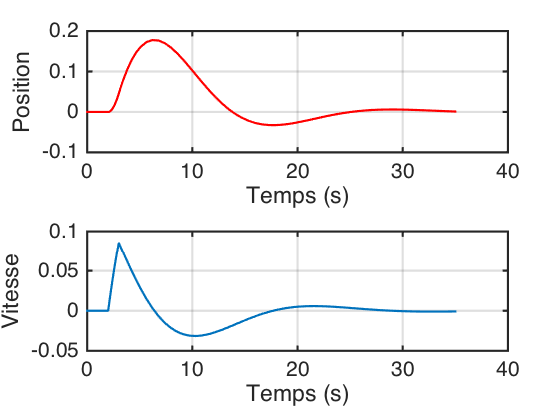

In [26]:
subplot(2,1,1);
plot(t,x(:,1),'r');
grid on;
xlabel('Temps (s)');
ylabel('Position');
subplot(2,1,2);
plot(t,x(:,2));
grid on;
xlabel('Temps (s)');
ylabel('Vitesse');


Suivre l'énoncé p.5 et p.6. On a le contrôle sur les paramètres des axes (par exemple, les "ticks"), voir la documentation pour **`gca`** et *Axes Properties*.

## Analyse des systèmes: quelques éléments pour débuter

On peut déclarer une fonction de transfert avec la fonction **`tf`** comme un rapport de polynômes, au numérateur et dénominateur, chacun déclaré sous forme de vecteur de coefficients (voir ci-dessus; il faut inscrire les coefficients nuls explicitement).

In [27]:
G = tf([1 1 0],[1 3 1 1])

G =
 
        s^2 + s
  -------------------
  s^3 + 3 s^2 + s + 1
 
Continuous-time transfer function.

Manipulation inverse pour obtenir les coefficients d'une fonction de transfert.

In [28]:
[num,den] = tfdata(G,'v')

num =

     0     1     1     0


den =

     1     3     1     1

Ce n'est pas très pratique pour les manipulations "à la main" (mais c'est ok dans les algorithmes), surtout pour les polynômes creux... Une alternative passe par la déclaration du symbole s. Retenir l'idiome

In [29]:
s = tf('s')  % symbole s pour les fonctions de transfert en temps continu

s =
 
  s
 
Continuous-time transfer function.

Une fois la variable `s` définie, voici une autre façon de déclarer la fonction de transfert $$F(s) = \frac{s^2+s}{s^3+3s^2+s+1}.$$

In [30]:
F = (s^2 + s)/(s^3 + 3*s^2 + s + 1)  

F =
 
        s^2 + s
  -------------------
  s^3 + 3 s^2 + s + 1
 
Continuous-time transfer function.

Pôles, zéros, gain statique, factorisation de fonctions de transferts.

In [31]:
ps = pole(F)
zs = zero(G)
g = dcgain(F)
zpk(F)

ps =

  -2.7693 + 0.0000i
  -0.1154 + 0.5897i
  -0.1154 - 0.5897i


zs =

     0
    -1


g =

     0


ans =
 
               s (s+1)
  ----------------------------------
  (s+2.769) (s^2 + 0.2307s + 0.3611)
 
Continuous-time zero/pole/gain model.

Attention: **`zpk`** signifie zero-pole-gain, mais il s'agit du gain $K$ de la factorization
$$F(s) = K \frac{(s-z_1)\ldots(s-z_m)}{(s-p_1)\ldots(s-p_n)},$$
qui est différent du gain statique en général.

In [32]:
S = zpk(zs,ps,1)  % on retrouve F. zpk(zs,ps,0) serait une mauvaise idée...

S =
 
               s (s+1)
  ----------------------------------
  (s+2.769) (s^2 + 0.2307s + 0.3611)
 
Continuous-time zero/pole/gain model.

Diagramme pôles-zéros dans le plan s: **``pzmap``**

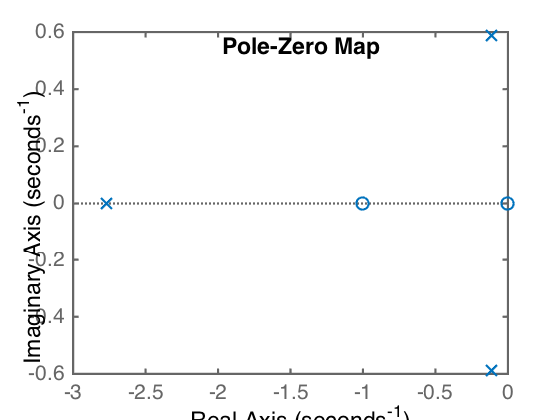

In [33]:
pzmap(F)

Notez que beaucoup des fonctions de manipulation de systèmes (entre autres) sont overloadées, c'est-à-dire peuvent prendre différents types d'arguments. Cela peut-être assez embrouillant, donc il faudra utiliser l'aide. Même chose pour le comportement suivant le nombre d'arguments de sortie. Comparez

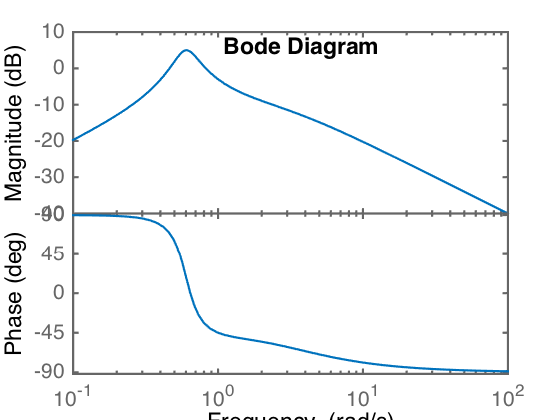

In [34]:
bode(F);  % sans argument, on obtient un tracé du diagramme de bode

In [35]:
[mag,phase]=bode(F);  % avec des arguments de sortie, on enregistre la réponse fréquentielle dans des vecteurs

Notez que **`bode`** peut prendre aussi d'autres arguments en entrée. Voir **`help bode`**.

Par défaut MATLAB ne fait pas les simplifications pôles/zéros (pour de bonnes raisons, voir ci-dessous). On peut forcer cette simplification grâce à la fonction **`minreal`** (qui veut dire "réalisation minimale"). On peut introduire une tolérance pour définir ce qu'on considère comme valeurs numériques identiques. voir **`help minreal`**.

In [36]:
F = s/(s+1)
G = F/(1+F)
zpk(G)
minreal(G)

F =
 
    s
  -----
  s + 1
 
Continuous-time transfer function.


G =
 
      s^2 + s
  ---------------
  2 s^2 + 3 s + 1
 
Continuous-time transfer function.


ans =
 
   0.5 s (s+1)
  -------------
  (s+1) (s+0.5)
 
Continuous-time zero/pole/gain model.


ans =
 
   0.5 s
  -------
  s + 0.5
 
Continuous-time transfer function.

MATLAB nous permet aussi de manipuler facilement les modèles d'état linéaires et stationaires avec **`ss`**, **`ssdata`**, etc. (manipulations qu'on peut combiner avec la librairie d'algèbre linéaire fournie). Soit le système à une entrée, une sortie, et dont l'état est de dimension $3$
$$ 
\begin{align*}
\dot x &= \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ -1 & -1 & -3 \end{bmatrix} x  
+ \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} u \\
y &= \begin{bmatrix} 0 & 1 & 1 \end{bmatrix}  x
\end{align*}
$$

In [37]:
A = [0 1 0; 0 0 1; -1 -1 -3]
B = [0; 0; 1]
C = [0 1 1]
D = [0]
sys = ss(A,B,C,D)  % crée un système avec modèle d'état
F = tf(sys)  % produit sa fonction de transfert C*inv(sI-A)*B + D
zpk(F)
[A1,B1,C1,D1]=ssdata(F)  % UNE réalisation de la fonction de transfert par modèle d'état, parmi une infinité possible

A =

     0     1     0
     0     0     1
    -1    -1    -3


B =

     0
     0
     1


C =

     0     1     1


D =

     0


sys =
 
  a = 
       x1  x2  x3
   x1   0   1   0
   x2   0   0   1
   x3  -1  -1  -3
 
  b = 
       u1
   x1   0
   x2   0
   x3   1
 
  c = 
       x1  x2  x3
   y1   0   1   1
 
  d = 
       u1
   y1   0
 
Continuous-time state-space model.


F =
 
        s^2 + s
  -------------------
  s^3 + 3 s^2 + s + 1
 
Continuous-time transfer function.


ans =
 
               s (s+1)
  ----------------------------------
  (s+2.769) (s^2 + 0.2307s + 0.3611)
 
Continuous-time zero/pole/gain model.


A1 =

   -3.0000   -1.0000   -1.0000
    1.0000         0         0
         0    1.0000         0


B1 =

     2
     0
     0


C1 =

    0.5000    0.5000         0


D1 =

     0

Pour revenir à notre discussion sur les simplifications pôles/zéros, un pôle et un zéro identiques indiquent un système qui n'est pas observable ou contrôlable, notions qui seront définies plus tard dans le cours ELE2200. Donc les systèmes $\frac{s-1}{(s+1)(s-1)}$ et $\frac{1}{(s+1)}$ par exemple sont différents. En fait, leur réalisation par modèle d'état est de dimension différente, et le premier système a ici un mode dynamique instable.

In [38]:
[A,B,C,D] = ssdata(1/(s+1))
[A1,B1,C1,D1] = ssdata((s-1)/((s-1)*(s+1)))
eig(A)
eig(A1)

A =

    -1


B =

     1


C =

     1


D =

     0


A1 =

     0     1
     1     0


B1 =

     2
     0


C1 =

    0.5000   -0.5000


D1 =

     0


ans =

    -1


ans =

    -1
     1

Note: on peut évidemment manipuler aussi les systèmes en temps discret, les transformées en $z$, etc. Mais cela fera plutôt l'objet d'autres cours (ELE2700, ELE4200...).

In [39]:
z = tf('z')
F = (z+0.5)/(z+0.9)

z =
 
  z
 
Sample time: unspecified
Discrete-time transfer function.


F =
 
  z + 0.5
  -------
  z + 0.9
 
Sample time: unspecified
Discrete-time transfer function.

## Scripts et functions

Plutôt que d'utiliser l'environnement interactif directement, il est généralement plus pratique d'utiliser un éditeur pour exécuter des séquences de commandes MATLAB qu'on enregistre dans un fichier appelé **script** (fichier de nom quelconque, **avec l'extension .m**). On utilisera l'éditeur de MATLAB, qui offre des facilités d'intégration avec l'interpréteur utiles, des fonctions d'analyse de code, un débogueur, etc. Un script peut être executé en tapant le nom du fichier dans l'interpréteur, ou en pressant F5 ou la flèche verte dans l'éditeur. Voici un exemple de script:

```julia
% fichier monScript.m
clear;  % clears the workspace (erases the variables from memory!)
clc;  % clears the screen
A = [1 2 3;4 5 6];  % définition d'une matrice, pas d'affichage
s = svd(A)  % affichage des valeurs singulières de A
plot(s,zeros(length(s)),'o');
```

Vous pouvez bien aussi définir vos propres fonctions. Une **fonction** dans MATLAB joue le même rôle que dans les autres languages de programmation (solution à un sous-problème, encapsulation de certaines variables nécessaires seulement pour une tâche locale, etc.). Attention: une fonction appelée **``foo``** doit être définie dans un fichier **``foo.m``**, c'est-à-dire, portant le même nom que la fonction. Voici un exemple de définition de fonction:

```julia
% on définit la fonction foo dans un fichier foo.m
% elle prend 2 arguments en entrée, et retourne deux résultats r et y
% on ne spécifie pas les types ou la signature de la fonction, comme d'habitude
function [r,d] = foo(x,y)

a = 1;  % la variable a est définie seulement dans foo, elle ne sera pas accessible dans le workspace

if x >= 0  % cette opération sur le type de x doit être valide, sinon erreur
  r = x+y+a;
else
  r = x-y;
end

d = rand(1,5)

end  % facultatif, sauf si vous souhaitez définir une sous-routine après foo dans le même fichier
```

In [40]:
[a,b]=foo(1,2)  % [~,b] = foo(1,2) si le premier élément n'est pas utile

a =

     4


b =

    0.7537    0.3804    0.5678    0.0759    0.0540

## Liens et brève comparaison avec d'autres environnements et languages

Bien sûr, le principal repproche que l'on peut faire à Matlab est que c'est un logiciel payant, dont les licenses peuvent coûter cher, surtout pour des utilisations non académiques. En contrepartie, le logiciel comprend de très nombreuses fonctionalités, dont le nombre ne cesse d'augmenter, et est généralement de bonne qualité (sauf parfois certaines toolbox lors dans leurs premières versions). Vous pourrez continuer à explorer ces fonctions au fur et à mesure de votre formation et selon votre spécialisation.

Il existe d'autres logiciels qui offrent des fonctionalités similaires à Matlab mais sont moins couteux, voir open source. Notamment:
* [Scilab](http://www.scilab.org), développé initialement dans les années 90 par l'INRIA et l'ENPC en France.
* [GNU Octave](https://www.gnu.org/software/octave/) qui cherche est être le plus compatible possible avec la syntaxe MATLAB.
* [Modelica](https://www.modelica.org) et des environnements gratuits comme [OpenModelica](https://www.openmodelica.org).
* [LabView](http://www.ni.com/labview/) qui est souvent utilisé pour des simulations et tests avec "hardware-in-the loop".
* [Opal-RT](http://www.opal-rt.com), très utilisé pour la simulation des réseaux électriques.
* ...

Notons aussi des languages comme [Mathematica](https://www.wolfram.com/mathematica/) ou [Maple](http://www.maplesoft.com/products/maple/), qui par rapport à MATLAB ciblent plus le calcul symbolique que numérique. MATLAB offre aussi une toolbox pour le calcul symbolique (`Symbolic Math Toolbox`).

D'autre part, certains languages de programmation généraux sont utilisés de manière similaire à Matlab pour le prototypage d'algorithmes. Citons juste
* [Python](https://www.python.org) et les libraires Numpy, Scipy, etc., qu'on peut installer plus facilement avec des distributions comme [Anaconda](https://www.continuum.io/why-anaconda),
* ou encore [Julia](http://julialang.org).

In [1]:
# julia
A = randn(6,4)
b = randn(6,1)
x = A\b

4x1 Array{Float64,2}:
 -0.190555
 -0.146046
  0.900769
  0.459416

# Simulink

### Ingénierie système à base de modèles

Une tendance émergente pour la gestion rigoureuse de projets complexes dans l'industrie est l'ingénierie système basée sur les modèles. Un modèle conceptuel classique de gestion de projet est celui du *cycle en V* ![image wiki du cycle en V](http://www.xqual.com/resources/images/tutorials/v_cycle.gif)
[//]: # "Si le lien ne marche pas, le remplacer par l'image copiée dans le dossier"

Traditionnellement, les premières phase de design aboutissent à des documents textes contenant les spécifications du produit à développer, les contraintes, etc. Ces documents servent aux ingénieurs pour la conception, ainsi que de référence pour les tests. Toutefois, la gestion de documents textes dans des grandes organisations et pour des projets complexes est difficile. En particulier, les interdépendances entre spécifications, requis et contraintes exprimées à différentes endroits, voir dans différents documents, sont difficiles à visualiser. Les spécifications textes tendent aussi à être ambigues. Typiquement, le cycle en V ne peut pas être suivi à la lettre, les étapes de conception ou test soulevant généralement des problèmes concernant les spécifications.

A la place, on aimerait manipuler uniquement des modèles graphiques représentant le système, tels que ceux utilisés dans Simulink. Des blocs peuvent spécificer les différentes parties sur système. La phase de conception implémente ces blocs, d'abord dans l'environnement de modélisation (Simulink), qui permet aussi de faire des simulations afin de s'assurer que les spécifications sont satisfaites. Les blocs correspondants à des éléments physiques doivent modéliser ces derniers adéquatement. Pour les blocs représentant des calculs à effectuer sur un ordinateur ou un microcontrôleur, comme mentionné plus haut, il est possible de directement générer du code source dans un language compilé, typiquement en C ou C++, qui implémente l'algorithme du bloc. Ainsi, idéalement on ne travaillerait quasiment qu'avec des modèles graphiques de haut niveau. Voici un exemple de modèle Simulink pour le système électrique d'un avion

![](power_aircraft_distribution_01.png)

Simulink et ses extensions est un outil complexe. Dans ce cours, on l'utilisera de façon assez élémentaire à des fins de simulation. Le site internet de MathWorks offre de nombreux tutoriels pour maîtriser des aspects plus avancés de développement de modèle, génération de code, etc. Vous pouvez aussi obtenir une liste de démos depuis Matlab

In [1]:
demo simulink  % par exemple, Vehicle Electrical and Climate Control Systems
demo simulink 'simulink control design'

# Références

* [Control Tutorials for MATLAB and Simulink](http://ctms.engin.umich.edu/CTMS/index.php?aux=Home)
* [Writing Fast MATLAB Code](http://www.mathworks.com/matlabcentral/fileexchange/5685-writing-fast-matlab-code)